# Import libraries

In [14]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load the dataset census-income

In [26]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.data', header=None,names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# drop the rows from the dataset where the data is not present

In [34]:
data = data.replace(' ?', np.nan)
data.dropna(inplace=True)
data.shape

(30162, 15)

# Randomly select 25000 rows from the dataframe data

In [35]:
df = data.sample(n=25000, random_state=42)

In [36]:
df.shape

(25000, 15)

### Drop two columns capital_gain and capital_loss

In [37]:
df = df.drop(['capital_gain','capital_loss'], axis=1)

In [38]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,55,United-States,>50K
26879,41,Private,178431,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,Taiwan,<=50K
19182,53,Private,290640,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,50,Germany,>50K
13485,31,Private,215297,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,45,United-States,<=50K
9625,34,Local-gov,188682,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K


# perform label encoding on the categorical features

In [39]:
ohe = OneHotEncoder()
le = LabelEncoder()
df.salary = le.fit_transform(df.salary)
df = pd.get_dummies(df, columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df.head()

,age,fnlwgt,education_num,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
234,28,76714,15,55,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26879,41,178431,9,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
19182,53,290640,9,50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13485,31,215297,9,45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9625,34,188682,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
maximum_accuracy = 0
accuracy_list = []
parameters_list = []
for i in range(10):
    sample = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample.drop('salary', axis=1), sample.salary, test_size=0.3, random_state=42, stratify=sample.salary)
    x_train = StandardScaler().fit_transform(x_train)
    params = { 
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['linear','poly', 'rbf', 'sigmoid'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), params)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    parameters_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > maximum_accuracy:
        maximum_accuracy = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample = sample

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 1
Accuracy: 0.7506666666666667

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 2
Accuracy: 0.7493333333333333

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 3
Accuracy: 0.761

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 4
Accuracy: 0.7506666666666667

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 5
Accuracy: 0.7486666666666667

{'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample 6
Accuracy: 0.748

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 7
Accuracy: 0.744

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 8
Accuracy: 0.7476666666666667

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 9
Accuracy: 0.7483333333333333

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 10
Accuracy: 0.7546666666666667



In [44]:
final_data = pd.DataFrame(data=[accuracy_list, parameters_list], index=['Accuracy', 'Parameters']).T
final_data

,Accuracy,Parameters
0,0.750667,"{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel'..."
1,0.749333,"{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel'..."
2,0.761,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."
3,0.750667,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
4,0.748667,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."
5,0.748,"{'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
6,0.744,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."
7,0.747667,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
8,0.748333,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
9,0.754667,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."


In [45]:
print(maximum_accuracy)
print(best_params)
print(best_model)
best_sample.head()

0.761
{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, degree=1, gamma=0.1, max_iter=100)


,age,fnlwgt,education_num,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
32341,74,199136,13,8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4604,26,171114,11,35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29333,25,41526,13,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26638,55,185195,13,99,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6219,46,175262,12,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
iterations = list()
accuracy_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample.drop('salary', axis=1), best_sample.salary, test_size=0.3, random_state=42, stratify=best_sample.salary)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    iterations.append(x)

In [56]:
iterations = np.array(iterations)
accuracy_list = np.array(accuracy_list)

In [57]:
print(iterations.shape)
print(accuracy_list.shape)

(100,)
(100,)


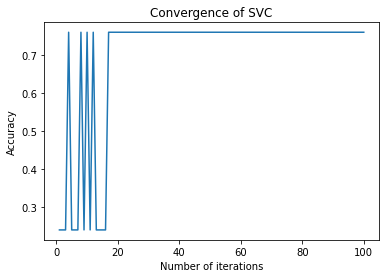

In [58]:
plt.plot(iterations, accuracy_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()